<h2> K-Nearest Neighbors (KNN) </h2>

In [54]:
# this is a laxy learning, due to all the processing is done at the moment of the prediction
#can be used to classification and regression

#importing pandas
import pandas as pd

In [55]:
# database used
data = {
    'A1' : [1,1.2,2,1.5,-1,-1.5,0,0.5],
    #'A2' : [1.1,1.6,0.3,-0.6,0.1,1.3,1.4,-0.4],
    'B1' : [1,1.4,0,-0.5,0,1.2,1.5,-0.3],
    #'B2' : [-1.1,1,0.2,-0.3,0,1.3,1.4,-0.2],
    'Y1' : [1,1,1,1,0,0,0,0],
    #'Y2' : [0,0,0,0,1,1,1,1]
}

data = pd.DataFrame(data)
data.head()

,A1,B1,Y1
0,1.0,1.0,1
1,1.2,1.4,1
2,2.0,0.0,1
3,1.5,-0.5,1
4,-1.0,0.0,0


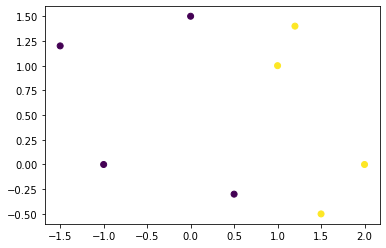

In [56]:
#visualizing the data
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(x = data.A1,y=data.B1, c=data.Y1)

plt.show()


In [57]:
#data to do the prediction
data_pred = {
    'A1' : [2.5,1.8,0.5,-1.3,-1],
    'B1' : [2,1,0,0,-1.5],
    #'A2' : [2.5,1.8,0.5,-1,-1],
    #'B2' : [2,1,0,0,-1.5]
}
data_pred = pd.DataFrame(data_pred)
data_pred.head()

,A1,B1
0,2.5,2.0
1,1.8,1.0
2,0.5,0.0
3,-1.3,0.0
4,-1.0,-1.5


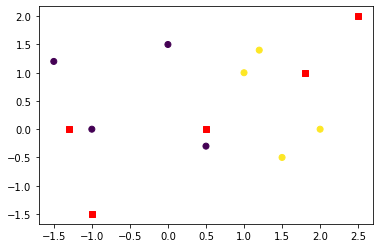

In [58]:
#visualizing data
fig, ax = plt.subplots()

ax.scatter(x = data.A1,y=data.B1, c=data.Y1)

ax.scatter(x=data_pred.A1,y=data_pred.B1, c='r', marker='s')

plt.show()

In [59]:
# importing the algorithm
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [60]:
# separating data
X = data[['A1','B1']]
Y = data.Y1

X_test = data_pred[['A1','B1']]

In [61]:
# doing the fit
clf.fit(X,Y)

KNeighborsClassifier(n_neighbors=3)

In [62]:
# prediciting the results
Y_pred = clf.predict(X_test)
Y_pred

array([1, 1, 1, 0, 0], dtype=int64)

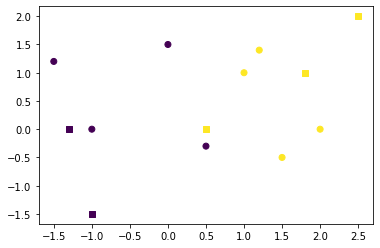

In [63]:
#visualizing the results
#visualizing data
fig, ax = plt.subplots()

ax.scatter(x = data.A1,y=data.B1, c=data.Y1)

ax.scatter(x=data_pred.A1,y=data_pred.B1, c=Y_pred, marker='s')

plt.show()

Using with Iris dataset

In [64]:
#import dataset iris
from sklearn.datasets import load_iris
#show data
data_iris = load_iris()
data_iris
# transforming data into a dataframe
iris = pd.DataFrame(data_iris.data)
iris.columns = data_iris.feature_names
iris['target'] = data_iris.target
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
# Selecting only columns of petal and its targets
iris1 = iris[['petal length (cm)','petal width (cm)','target']] 
iris1 = iris1[iris1['target'].isin([1,2])]
iris1.head(5)

,petal length (cm),petal width (cm),target
50,4.7,1.4,1
51,4.5,1.5,1
52,4.9,1.5,1
53,4.0,1.3,1
54,4.6,1.5,1


In [66]:
#separating data
X = iris1[['petal length (cm)','petal width (cm)']]
Y = iris1.target

In [69]:
# separating train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(f"len x: {len(X)} & len x_train: {len(x_train)} & len x_test: {len(x_test)}")

len x: 100 & len x_train: 67 & len x_test: 33


In [73]:
x_train

,petal length (cm),petal width (cm)
78,4.5,1.5
143,5.9,2.3
55,4.5,1.3
116,5.5,1.8
115,5.3,2.3
...,...,...
110,5.1,2.0
121,4.9,2.0
64,3.6,1.3
142,5.1,1.9


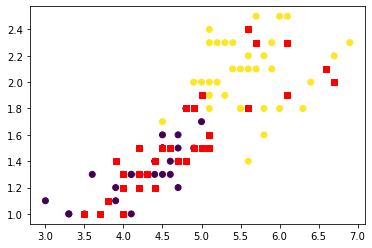

In [76]:
#visualizing the results
#visualizing data
fig, ax = plt.subplots()

ax.scatter(x = x_train['petal length (cm)'], y = x_train['petal width (cm)'], c= y_train)

ax.scatter(x= x_test['petal length (cm)'], y = x_test['petal width (cm)'], c= 'r', marker='s')

plt.show()

In [77]:
# importing the algorithm
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
y_pred = clf.predict(x_test)
y_pred

array([1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2])

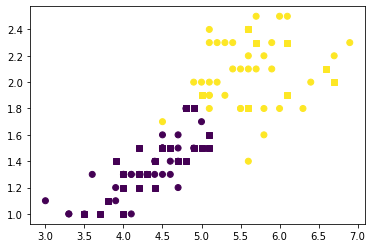

In [81]:
#visualizing the results
#visualizing data
fig, ax = plt.subplots()

ax.scatter(x = x_train['petal length (cm)'], y = x_train['petal width (cm)'], c= y_train)

ax.scatter(x= x_test['petal length (cm)'], y = x_test['petal width (cm)'], c= y_pred, marker='s')

plt.show()

In [82]:
#verifying with the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[19,  0],
       [ 6,  8]], dtype=int64)

In [85]:
# finding the wrong values in the prediction
x_wrong = x_test[y_test != y_pred]
x_wrong

,petal length (cm),petal width (cm)
133,5.1,1.5
123,4.9,1.8
126,4.8,1.8
127,4.9,1.8
138,4.8,1.8
119,5.0,1.5


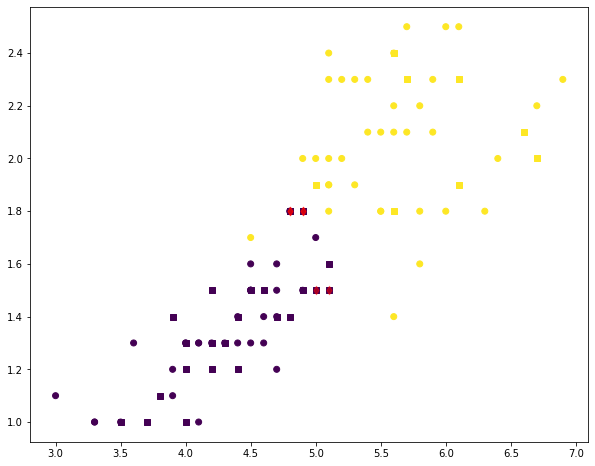

In [90]:
#visualizing the results
#visualizing data
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x = x_train['petal length (cm)'], y = x_train['petal width (cm)'], c= y_train)

ax.scatter(x= x_test['petal length (cm)'], y = x_test['petal width (cm)'], c= y_pred, marker='s')

ax.scatter(x= x_wrong['petal length (cm)'], y = x_wrong['petal width (cm)'], c= 'r', marker='d', alpha=0.5)

plt.show()